### 과일 데이터를 CNN으로 Image 분류

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fruits = np.load("./Data/fruits.npy")
fruits.shape
# (300,100,100)

(300, 100, 100)

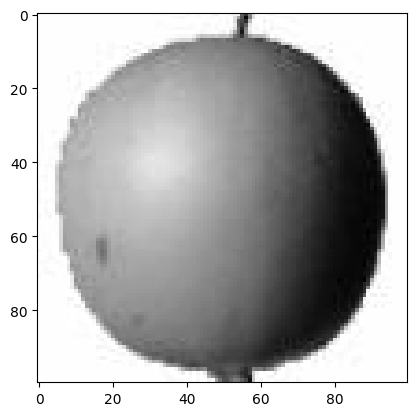

In [3]:
# image로 확인하기
plt.imshow(fruits[0].reshape(100,100),cmap='gray_r')
plt.show()

In [185]:
# target 만들기
# np.full(100,2): 100개를 만들고 2라는 숫자를 넣는다
target = np.concatenate([np.zeros(100),np.ones(100),np.full(100,2)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [186]:
from sklearn.model_selection import train_test_split
train_scaled = fruits.reshape(-1, 100, 100, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, target, test_size=0.2, random_state=42)

In [187]:
print(len(fruits.reshape(-1,100,100,1)))
print(len(target))

print(len(train_scaled))
print(len(val_scaled))
print(len(train_target))
print(len(val_target))


300
300
240
60
240
60


In [188]:
# 2. 모델 + 합성곱 층
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (100,100,1)))

In [189]:
# 3. 풀링층
model.add(keras.layers.MaxPooling2D(2))
# (2, 2) 최대풀링, (2, 2, 3)의 특성맵
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3,activation='softmax'))

In [191]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 40000)             0         
                                                                 
 dense_22 (Dense)            (None, 100)              

In [192]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("./Data/best_cnn_fruit.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=0.2,restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=[val_scaled,val_target],callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
8/8 [==============================] - 1s 89ms/step - loss: 1.2531 - accuracy: 0.5417 - val_loss: 0.5357 - val_accuracy: 0.8333
Epoch 2/20
8/8 [==============================] - 1s 76ms/step - loss: 0.3710 - accuracy: 0.9250 - val_loss: 0.1280 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 1s 78ms/step - loss: 0.0961 - accuracy: 0.9750 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 1s 67ms/step - loss: 0.0339 - accuracy: 0.9875 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 1s 79ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 1s 65ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000


In [204]:
model.evaluate(train_scaled,train_target)

8/8 [==============================] - 0s 18ms/step - loss: 0.0031 - accuracy: 1.0000


[0.003095022402703762, 1.0]

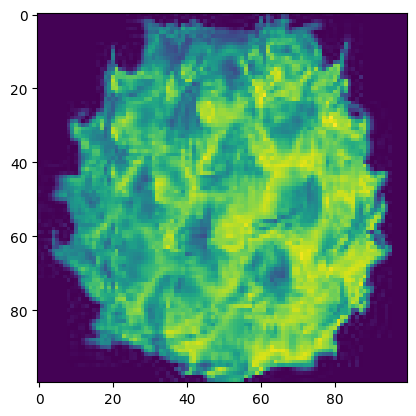

In [219]:
# 이미지 확인해보기
fruitsName = ['apple','pineapple','banana']
plt.imshow(val_scaled[19].reshape(100,100))
plt.show()

In [220]:
preds = model.predict(val_scaled[19:20])
print(preds)
print(preds[0])

1/1 [==============================] - 0s 24ms/step
[[8.1297301e-04 9.9918705e-01 1.7296502e-08]]
[8.1297301e-04 9.9918705e-01 1.7296502e-08]


In [221]:
print(fruitsName[np.argmax(preds)])
print(fruitsName[list(preds[0]).index(max(preds[0]))])

pineapple
pineapple


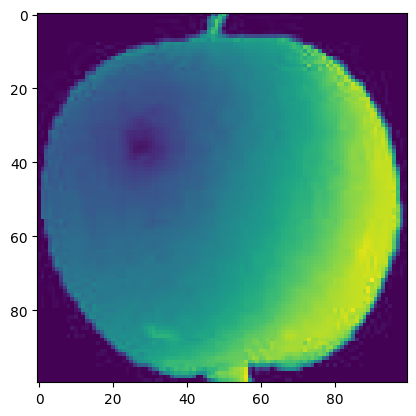

In [222]:
# 이미지 확인해보기
fruitsName = ['apple','pineapple','banana']
plt.imshow(val_scaled[20].reshape(100,100))
plt.show()

In [223]:
preds = model.predict(val_scaled[20:21])
print(fruitsName[np.argmax(preds)])

1/1 [==============================] - 0s 11ms/step
apple


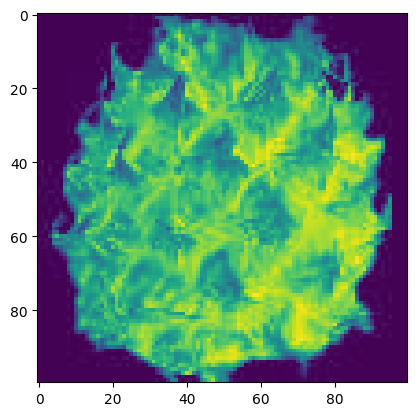

1/1 [==============================] - 0s 13ms/step
pineapple


In [226]:
# 이미지 확인해보기
fruitsName = ['apple','pineapple','banana']
plt.imshow(val_scaled[31].reshape(100,100))
plt.show()
preds = model.predict(val_scaled[31:32])
print(fruitsName[np.argmax(preds)])

In [224]:
# 가중치 확인
print(model.weights)
# 4차원 배열 (픽셀 하나의 값)

[<tf.Variable 'conv2d_12/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.05465483, -0.09352706, -0.03975486, -0.10629924,
           0.02401883,  0.01922799,  0.1032335 , -0.00107322,
          -0.03972474, -0.04611927, -0.12995404,  0.07525295,
          -0.09779882,  0.05506421, -0.07482846,  0.05566311,
          -0.01634552,  0.07610676,  0.03384236, -0.13616617,
          -0.10526353, -0.08011782,  0.11471389,  0.10913672,
          -0.02209158,  0.07211601,  0.03361559,  0.02173764,
          -0.10500277, -0.05350364, -0.13005431, -0.02814554]],

        [[ 0.08851146,  0.02465662, -0.07790183,  0.10652543,
           0.05503923,  0.13705689,  0.00968683, -0.1376784 ,
           0.14401159, -0.10267454,  0.11213224, -0.06373528,
          -0.12104022,  0.10478477,  0.11907488, -0.04859905,
           0.08435674,  0.13326368,  0.08697306,  0.02911735,
           0.10892493, -0.08132081, -0.1293701 , -0.12614949,
          -0.10210212, -0.08122473,  0.07853754,  0.